In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
#import datasets
true_data = pd.read_csv("True.csv")
fake_data = pd.read_csv("Fake.csv")

true_data['label'] = 1
fake_data['label'] = 0

In [ ]:
#creating one dataset out of the true and fake data
news_data = pd.concat([true_data, fake_data], ignore_index= True)

#combining the title and text columns to create one content column
news_data['content'] = news_data['title'] + " " + news_data['text']

#creating a stopword list out of NLTK's stopword list, punctuation, and adding reuters since it appears in many of the True articles
stopword_list = stopwords.words('english')
punctuation = [p for p in string.punctuation]
stopword_list.extend(punctuation)
stopword_list.append("reuters")

#creating training and testing data
training_text, test_text, training_labels, test_labels = train_test_split(
    news_data['content'], news_data['label'],
    test_size=0.25,
    random_state=1842, 
    stratify=news_data['label']
)


In [ ]:
#initializing countvectorizer using the previously created stopword list and the 10000 most important features
vect = CountVectorizer(stop_words= stopword_list, max_features=10000)

#training the model by counting word occurences of the 10000 more frequent words in the training data
x_train_counts = vect.fit_transform(training_text)

#couting word occurences of the vocabualry built from training the model
x_test_counts = vect.transform(test_text)

#creating, training, and fitting a multinomial Naive Bayes classification model to classify news articles as true or false
model = MultinomialNB()
model.fit(x_train_counts, training_labels)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
#using test set to predict class labels
y_pred = model.predict(x_test_counts)

#extracting vocabulary model was trained on 
feature_names = vect.get_feature_names_out()

#extracting learned word probabilities
log_probs = model.feature_log_prob_

#convert log_probs to probabilites
probs = np.exp(log_probs)

#measuring how much more associated each word is with true vs. fake news
odds = probs[1] - probs[0]


#extracting words most associated with fake news articles
N = 1000
top_fake_words = list(feature_names[np.argsort(odds)[:N]])
print(f"Top {N} fake-oriented words:", top_fake_words)

print("Accuracy:", accuracy_score(test_labels, y_pred))
print("\nClassification Report:\n", classification_report(test_labels, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(test_labels, y_pred))

Top {N} fake-oriented words: ['trump', 'video', 'hillary', 'like', 'us', 'via', 'obama', 'one', 'image', 'even', 'people', 'america', 'twitter', 'clinton', 'news', 'know', 'com', 'featured', 'watch', 'black', 'media', 'donald', 'get', 'right', 'american', 'pic', 'time', 'fact', 'really', 'man', 'going', 'gop', 'story', 'fox', 'way', 'https', 'actually', 'every', 'images', 'cnn', 'never', 'realdonaldtrump', 'women', 'getty', 'americans', 'think', 'well', 'show', 'see', 'fbi', 'got', 'thing', 'read', 'much', 'go', 'something', 'make', 'racist', 'ever', 'gun', 'woman', 'went', 'today', 'mr', 'want', 'back', 'let', 'things', '2017', 'nothing', 'good', 'press', 'anyone', 'fake', 'times', 'course', 'co', 'lives', 'hate', 'matter', 'great', 'anything', 'someone', 'look', 'life', 'believe', 'everyone', 'person', 'school', 'truth', 'white', 'another', 'students', 'shooting', 'many', 'wire', 'family', 'left', 'history', 'facebook', 'isis', 'host', '21st', 'post', 'night', 'century', 'entire', 'w

In [ ]:
#top words in fake news articles
top_fake_words = feature_names[np.argsort(probs[0])[::-1][0:20]]

#top words in true news articles
top_true_words = feature_names[np.argsort(probs[1])[::-1][0:20]]

#printing top words in fake and true news articles
print("Top words in Fake News articles:",top_fake_words)
print("\n Top words in True News articles:", top_true_words)


#top 20 real oritented words
top_real = np.argsort(odds)[-10:]

#top 20 fake oriented words
top_fake = np.argsort(odds)[:10]

print("\nMost REAL-oriented words:")
for i in top_real:
    print(feature_names[i], odds[i])

print("\nMost FAKE-oriented words:")
for i in top_fake:
    print(feature_names[i], odds[i])


Top words in Fake News articles: ['trump' 'said' 'president' 'people' 'one' 'would' 'obama' 'clinton'
 'donald' 'like' 'video' 'hillary' 'us' 'also' 'news' 'new' 'white' 'even'
 'time' 'state']

 Top words in True News articles: ['said' 'trump' 'would' 'president' 'state' 'government' 'house' 'new'
 'states' 'republican' 'also' 'united' 'people' 'year' 'told' 'could'
 'one' 'washington' 'party' 'two']

Most REAL-oriented words:
republican 0.0016857498801729684
washington 0.0016979859145576327
minister 0.0017468240459451152
china 0.001757717510442858
north 0.0017976019063289813
united 0.0018031392869553439
state 0.0020038396377773647
would 0.0022155321810192153
government 0.0023637725653270474
said 0.014591006337341467

Most FAKE-oriented words:
trump -0.003849924803700359
video -0.0029133928218579796
hillary -0.002508328650860048
like -0.0024731798470654298
us -0.002357755941763582
via -0.0022762482309148756
obama -0.001956272148047428
one -0.0018911664311667704
image -0.00181360453024

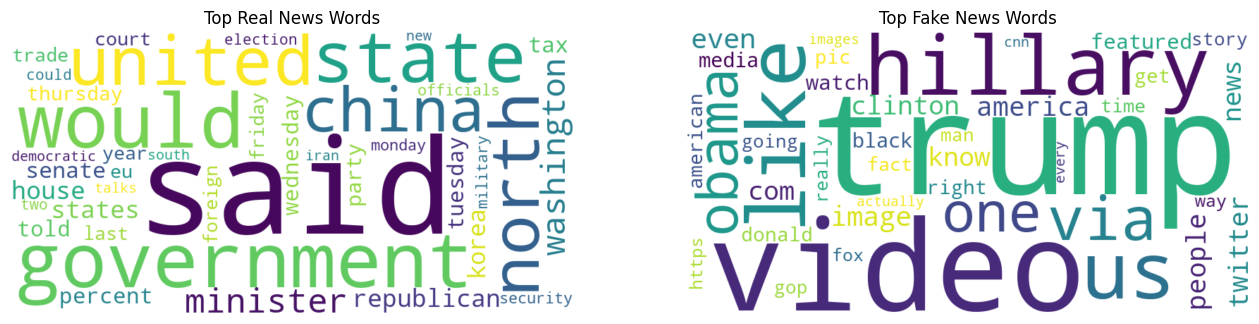

In [ ]:
#creating a word cloud 
# !pip install wordcloud matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

#create dictionaries for real and fake words
top_words = 40  # number of words to include

#get indices of top positive (real) and negative (fake) log_odds
top_real_idx = np.argsort(log_odds)[-top_words:]
top_fake_idx = np.argsort(log_odds)[:top_words]

#create dictionaries
real_words = {feature_names[i]: log_odds[i] for i in top_real_idx}
fake_words = {feature_names[i]: -log_odds[i] for i in top_fake_idx} 

#real news word cloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(real_words)

#fake news word cloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fake_words)

#plot graphs
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Top Real News Words')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top Fake News Words')

plt.show()




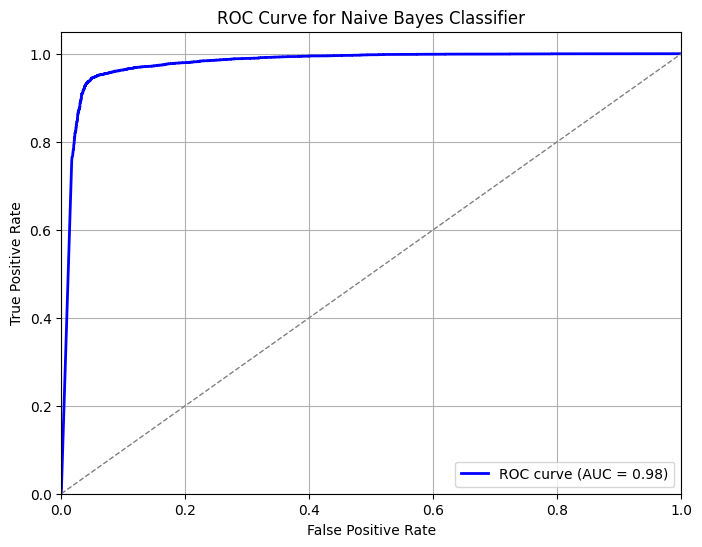

In [ ]:
#creating and ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#get predicted probabilities for the real news)
y_prob = model.predict_proba(x_test_counts)[:, 1]  # index 1 = real news

fpr, tpr, thresholds = roc_curve(test_labels, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
#expanding stop word list to include the top words associated with fake news to see if it is possible to pass fake news articles as true by reducing use of certain buzzwords
stopword_list_expanded = stopwords.words("english")
stopword_list_expanded.extend(string.punctuation)
stopword_list_expanded.append('reuters')
stopword_list_expanded.extend(top_fake_words)


print(top_fake_words)
print(stopword_list_expanded)

['trump', 'video', 'hillary', 'like', 'us', 'via', 'obama', 'one', 'image', 'even', 'people', 'america', 'twitter', 'clinton', 'news', 'know', 'com', 'featured', 'watch', 'black', 'media', 'donald', 'get', 'right', 'american', 'pic', 'time', 'fact', 'really', 'man', 'going', 'gop', 'story', 'fox', 'way', 'https', 'actually', 'every', 'images', 'cnn', 'never', 'realdonaldtrump', 'women', 'getty', 'americans', 'think', 'well', 'show', 'see', 'fbi', 'got', 'thing', 'read', 'much', 'go', 'something', 'make', 'racist', 'ever', 'gun', 'woman', 'went', 'today', 'mr', 'want', 'back', 'let', 'things', '2017', 'nothing', 'good', 'press', 'anyone', 'fake', 'times', 'course', 'co', 'lives', 'hate', 'matter', 'great', 'anything', 'someone', 'look', 'life', 'believe', 'everyone', 'person', 'school', 'truth', 'white', 'another', 'students', 'shooting', 'many', 'wire', 'family', 'left', 'history', 'facebook', 'isis', 'host', '21st', 'post', 'night', 'century', 'entire', 'words', '21wire', 'tell', 'rea

In [ ]:
#initializing countvectorizer using the newly created stopword list and the 10000 most important features
vect2 = CountVectorizer(stop_words=stopword_list_expanded, max_features=10000)

#training the model by counting word occurences of the 10000 more frequent words in the training data
x_train_counts2 = vect2.fit_transform(training_text)

#couting word occurences of the vocabualry built from training the model
x_test_counts2 = vect2.transform(test_text)

In [ ]:
#initializing the new model
model2 = MultinomialNB()

#fitting the new model
model2.fit(x_train_counts2, training_labels)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
#make predictions on the test set
y_pred2 = model2.predict(x_test_counts2)

#outputting performance measures
print("\n=== MODEL WITHOUT FAKE WORDS ===")
print("Accuracy:", accuracy_score(test_labels, y_pred2))
print("\nClassification Report:\n", classification_report(test_labels, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(test_labels, y_pred2))


=== MODEL WITHOUT FAKE WORDS ===
Accuracy: 0.924543429844098

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      5871
           1       0.93      0.91      0.92      5354

    accuracy                           0.92     11225
   macro avg       0.92      0.92      0.92     11225
weighted avg       0.92      0.92      0.92     11225


Confusion Matrix:
 [[5508  363]
 [ 484 4870]]


In [ ]:
#extracting vocabulary
feature_names2 = vect2.get_feature_names_out()

#extracting learned word log probs
log_probs2 = model2.feature_log_prob_

#turining log probs to probabilities
probs_2 = np.exp(log_probs2)

print(probs_2[0:5])

#calculating most common words in fake news articles
top_fake_words2 = feature_names2[np.argsort(probs_2[0])[::-1][0:20]]

#calculating most common words in true news articles
top_true_words2 = feature_names2[np.argsort(probs_2[1])[::-1][0:20]]

print("Top words in Fake News articles:",top_fake_words2)
print("\n Top words in True News articles:", top_true_words2)


#calculate how much each word is associated with true vs. fake news
odds2 = probs_2[1] - probs_2[0]  # positive = more real, negative = more fake



#top 20 real-oriented words
top_real2 = np.argsort(odds2)[-20:]
#top 20 fake-oriented words
top_fake2 = np.argsort(odds2)[:20]

print("\nMost REAL-oriented words:")
for i in top_real2:
    print(feature_names2[i], odds2[i])

print("\nMost FAKE-oriented words:")
for i in top_fake2:
    print(feature_names2[i], odds2[i])

[[1.69645940e-03 5.10118259e-05 3.70995097e-05 ... 1.60202428e-05
  5.31197526e-05 4.21585338e-07]
 [1.61596081e-03 6.86474429e-07 3.43237214e-07 ... 1.23222160e-04
  2.02509956e-05 1.95645212e-04]]
Top words in Fake News articles: ['said' 'president' 'would' 'also' 'new' 'state' 'house' 'campaign' 'year'
 'could' 'states' 'republican' 'told' 'country' 'two' 'election'
 'government' 'years' 'last' 'party']

 Top words in True News articles: ['said' 'would' 'president' 'state' 'government' 'house' 'new' 'states'
 'republican' 'also' 'united' 'year' 'told' 'could' 'washington' 'party'
 'two' 'last' 'election' 'north']

Most REAL-oriented words:
monday 0.0011211163498994355
friday 0.0011413747264503358
republican 0.0011880447626853503
percent 0.0011958368033590993
state 0.0012325260951094735
trade 0.0012538936345038634
thursday 0.0012867358013959693
senate 0.0013352659305959232
wednesday 0.00136726598184739
tuesday 0.0013674897025688526
eu 0.0013721727111101981
tax 0.0014376555127607032
u

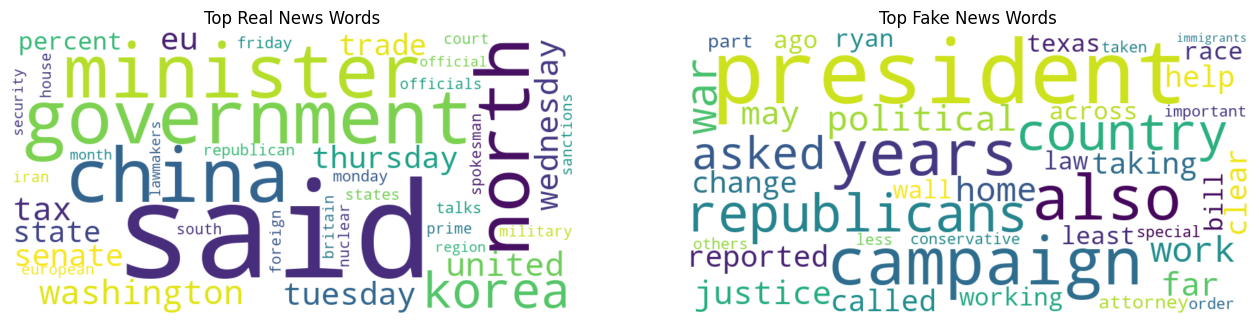

In [ ]:
#create word cloud 

top_words2 = 40  

top_real_idx2 = np.argsort(log_odds2)[-top_words2:]
top_fake_idx2 = np.argsort(log_odds2)[:top_words2]


real_words2 = {feature_names2[i]: log_odds2[i] for i in top_real_idx2}
fake_words2 = {feature_names2[i]: -log_odds2[i] for i in top_fake_idx2}  


wordcloud_real2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(real_words2)


wordcloud_fake2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fake_words2)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real2, interpolation='bilinear')
plt.axis('off')
plt.title('Top Real News Words')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake2, interpolation='bilinear')
plt.axis('off')
plt.title('Top Fake News Words')

plt.show()




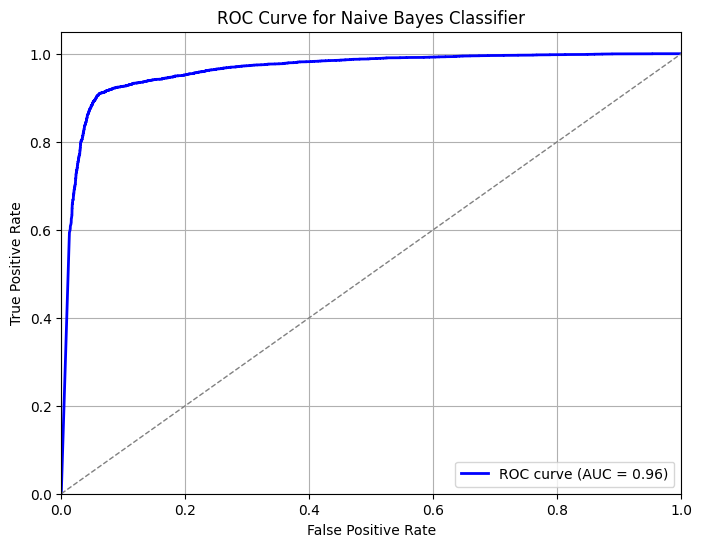

In [ ]:
#create ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob2 = model2.predict_proba(x_test_counts2)[:, 1]  # index 1 = real news

fpr2, tpr2, thresholds = roc_curve(test_labels, y_prob2)
roc_auc2 = auc(fpr2, tpr2)


plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()